## ECE 239 Final Project

In this project we explore various deep learning algorithms on the EEG dataset. 


In [4]:
# Imports and setup

import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.layers import LSTM
from keras.layers import GRU

from utils.load_data import *
from models.cnn import CNN
from models.rnn import RNN

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
# Loads data from the EEG dataset and removes all EOG data

person_train_valid, X_train_valid, y_train_valid, person_test, X_test, y_test = load_EEG_data()

print ('Training/Valid data shape: {}'.format(X_train_valid.shape))
print ('Test data shape: {}'.format(X_test.shape))
print ('Training/Valid target shape: {}'.format(y_train_valid.shape))
print ('Test target shape: {}'.format(y_test.shape))
print ('Person train/valid shape: {}'.format(person_train_valid.shape))
print ('Person test shape: {}'.format(person_test.shape))

Training/Valid data shape: (2115, 22, 1000)
Test data shape: (443, 22, 1000)
Training/Valid target shape: (2115,)
Test target shape: (443,)
Person train/valid shape: (2115, 1)
Person test shape: (443, 1)


### Split into train and validation datasets

In [8]:
X_train, y_train, X_val, y_val = split_train_val(X_train_valid, y_train_valid, percent_validation=0.1)

print ('Training data shape: {}'.format(X_train.shape))
print ('Training target shape: {}'.format(y_train.shape))
print ('Validation data shape: {}'.format(X_val.shape))
print ('Validation target shape: {}'.format(y_val.shape))

Training data shape: (1904, 22, 1000)
Training target shape: (1904,)
Validation data shape: (211, 22, 1000)
Validation target shape: (211,)


## One hot encoding for all labels

In [9]:
print (y_val[33])
print (y_val.shape)
print (y_test.shape)

def convert_to_label(num):
    return np.array([1.0*(num==769),  1.0*(num==770), 1.0*(num==771), 1.0*(num==772)])

y_train_labels = np.array([convert_to_label(yi) for yi in y_train])
y_val_labels = np.array([convert_to_label(yi) for yi in y_val])
y_test_labels = np.array([convert_to_label(yi) for yi in y_test])

print (y_val_labels[33])
print (y_val_labels.shape)
print (y_test_labels.shape)


770
(211,)
(443,)
[0. 1. 0. 0.]
(211, 4)
(443, 4)


## Classifying data using a CNN

In [10]:
cnn = CNN(X_train, y_train_labels, X_val, y_val_labels, X_test, y_test_labels)
cnn.train(stride=2, optimizer='adam', epochs=5)
test_loss, test_accuracy = cnn.evaluate()
print('Test loss:', test_loss)
print('Test accuracy:', test_accuracy)

Instructions for updating:
Colocations handled automatically by placer.
Train on 1904 samples, validate on 211 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/5
1904/1904 [==============================] - 1s 500us/sample - loss: 1.4267 - acc: 0.2547 - val_loss: 1.3818 - val_acc: 0.3128
Epoch 2/5
1904/1904 [==============================] - 1s 291us/sample - loss: 1.3758 - acc: 0.3020 - val_loss: 1.3915 - val_acc: 0.2796
Epoch 3/5
1904/1904 [==============================] - 1s 290us/sample - loss: 1.3393 - acc: 0.3472 - val_loss: 1.4193 - val_acc: 0.3033
Epoch 4/5
1904/1904 [==============================] - 1s 291us/sample - loss: 1.2736 - acc: 0.3934 - val_loss: 1.4331 - val_acc: 0.2844
Epoch 5/5
443/443 [==============================] - 0s 125us/sample - loss: 1.4604 - acc: 0.3205
Test loss: 1.4604124737646995
Test accuracy: 0.32054177


## Classifying data using an LSTM Architecture

Train on 1904 samples, validate on 211 samples
Epoch 1/5
1904/1904 [==============================] - 8s 4ms/step - loss: 1.4188 - acc: 0.2715 - val_loss: 1.3854 - val_acc: 0.2654
Epoch 2/5
1904/1904 [==============================] - 5s 3ms/step - loss: 1.1785 - acc: 0.5525 - val_loss: 1.3748 - val_acc: 0.2796
Epoch 3/5
1904/1904 [==============================] - 5s 3ms/step - loss: 1.0020 - acc: 0.7064 - val_loss: 1.3946 - val_acc: 0.2654
Epoch 4/5
1904/1904 [==============================] - 5s 3ms/step - loss: 0.8432 - acc: 0.7684 - val_loss: 1.4587 - val_acc: 0.3033
Epoch 5/5
1904/1904 [==============================] - 5s 3ms/step - loss: 0.7144 - acc: 0.8246 - val_loss: 1.4721 - val_acc: 0.2844
Test loss: 1.4925636989537534
Test accuracy: 0.30699774279820463


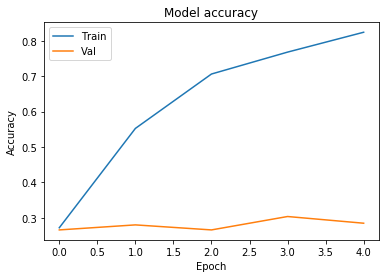

In [32]:
rnn = RNN(X_train, y_train_labels, X_val, y_val_labels, X_test, y_test_labels)
rnn.train(RNN_architecture=LSTM, activation="sigmoid", \
              optimizer='adam', epochs=5, batch_size=64, dropout=0.3)
test_loss, test_accuracy = rnn.evaluate()
print('Test loss:', test_loss)
print('Test accuracy:', test_accuracy)


rnn.plot()

## Check Results

In [33]:
# TRAINING
print("TRAINING")
N = 400
sampleX = X_train[0:N,:,:]
sampleY = y_train_labels[0:N]
predictedY = rnn.predict(sampleX)
predictedLabels = np.argmax(predictedY, axis=1)
sampleLabels = np.argmax(sampleY, axis=1)

print("Predicted labels:")
print(predictedLabels)
print("Actual labels:")
print(sampleLabels)

num_equal = np.sum(1.0*np.equal(sampleLabels, predictedLabels))
print("Number of labels that are equal:")
print(num_equal)
print("Accuracy: ")
print(num_equal/N)

# VALIDATION
print("VALIDATION")
N = 400
sampleX = X_val[0:N,:,:]
sampleY = y_val_labels[0:N]
predictedY = rnn.predict(sampleX)
predictedLabels = np.argmax(predictedY, axis=1)
sampleLabels = np.argmax(sampleY, axis=1)

print("Predicted labels:")
print(predictedLabels)
print("Actual labels:")
print(sampleLabels)

num_equal = np.sum(1.0*np.equal(sampleLabels, predictedLabels))
print("Number of labels that are equal:")
print(num_equal)
print("Accuracy: ")
print(num_equal/N)



TRAINING
Predicted labels:
[0 0 3 1 3 0 0 3 3 0 2 0 2 0 2 3 1 2 0 0 1 2 2 3 1 1 1 3 1 0 1 1 1 1 1 2 0
 1 2 3 3 0 0 1 2 0 2 1 3 2 2 1 2 1 3 1 2 0 0 2 0 0 0 0 1 2 3 2 3 3 0 3 3 2
 1 1 2 3 0 0 2 2 2 1 1 1 2 0 2 0 2 3 0 0 2 1 0 2 0 0 2 0 1 2 1 0 2 3 2 1 3
 0 3 1 2 3 2 1 3 3 1 3 1 1 3 2 3 3 2 0 2 0 0 1 0 1 2 3 0 2 1 2 0 0 1 2 3 3
 3 1 1 1 3 0 2 3 1 2 2 1 3 1 3 3 0 0 1 1 3 1 3 3 3 0 0 0 3 2 2 3 2 2 0 1 0
 0 1 3 3 2 1 1 1 2 2 3 3 0 0 1 3 2 3 2 1 0 2 1 0 2 2 2 3 3 3 2 3 2 3 3 2 3
 2 0 1 3 0 3 0 0 1 3 0 2 0 2 0 3 1 3 2 1 1 2 1 2 2 0 1 0 1 3 3 2 3 3 0 2 3
 1 2 3 3 1 1 3 2 0 2 1 2 1 1 0 0 2 1 1 1 1 1 2 3 3 3 0 0 1 3 1 2 1 1 1 2 0
 1 2 0 2 2 0 2 2 0 3 2 0 1 3 2 2 0 2 1 2 1 1 3 0 2 3 2 2 0 3 2 3 3 2 2 0 3
 0 1 1 2 3 0 1 3 1 0 3 3 2 3 2 0 2 2 3 3 0 0 3 3 2 2 1 1 1 2 1 1 1 0 1 2 0
 2 3 3 0 0 1 3 0 0 1 1 0 2 2 0 1 1 2 2 0 3 1 0 2 1 3 3 3 2 2]
Actual labels:
[0 0 3 1 3 0 0 0 3 0 3 1 2 0 2 3 1 2 0 0 1 2 2 3 3 1 1 3 1 0 1 1 1 1 1 2 0
 1 2 3 3 0 0 1 2 0 2 1 3 2 2 1 2 1 3 1 2 0 0 2 0 0 0 0 1 2 3 2 3 3 0 3 

## Classifying Data using a GRU Architecture

In [14]:
rnn = RNN(X_train, y_train_labels, X_val, y_val_labels, X_test, y_test_labels)
rnn.train(RNN_architecture=GRU, activation="sigmoid", \
              optimizer='adam', epochs=5, batch_size=64, dropout=0.1)
test_loss, test_accuracy = rnn.evaluate()
print('Test loss:', test_loss)
print('Test accuracy:', test_accuracy)

Train on 1904 samples, validate on 211 samples
Epoch 1/5
1904/1904 [==============================] - 5s 2ms/step - loss: 0.6889 - acc: 0.6624 - val_loss: 0.6464 - val_acc: 0.6919
Epoch 2/5
1904/1904 [==============================] - 4s 2ms/step - loss: 0.4274 - acc: 0.8167 - val_loss: 0.6387 - val_acc: 0.7062
Epoch 3/5
1904/1904 [==============================] - 4s 2ms/step - loss: 0.3080 - acc: 0.8964 - val_loss: 0.6367 - val_acc: 0.7097
Epoch 4/5
1904/1904 [==============================] - 4s 2ms/step - loss: 0.2266 - acc: 0.9442 - val_loss: 0.6463 - val_acc: 0.7026
Epoch 5/5
1904/1904 [==============================] - 4s 2ms/step - loss: 0.1708 - acc: 0.9730 - val_loss: 0.6702 - val_acc: 0.7097
Test loss: 0.6635286232149628
Test accuracy: 0.6963882631964932
